In [1]:
cd ..

/home/msi/projects/diplomka


In [2]:
from traced_v2.site_analyzer import SiteAnalyzer
from traced_v2.trace_analyzer import TraceAnalyzer

In [3]:
i = TraceAnalyzer('', '')

In [4]:
i.anomalies_model

In [5]:
from pathlib import Path

In [6]:
all_files = sorted(list(Path("data/sites_v2").rglob("*.json")), key=lambda x: x.name)

In [9]:
analyzer =  SiteAnalyzer("src", "dest") 

In [10]:
result = analyzer.process_files(all_files, show_progress=True,)

Processing files:   0%|          | 0/476901 [00:00<?, ?files/s]

Empty hops or asns
Missing key path_complete in data
Empty hops or asns
Missing key path_complete in data
Missing key path_complete in data
Missing key path_complete in data
Missing key path_complete in data
Missing key path_complete in data
Missing key path_complete in data
Empty hops or asns
Empty hops or asns
Empty hops or asns
Empty hops or asns
Missing key path_complete in data
Empty hops or asns
Missing key path_complete in data
Empty hops or asns
Missing key path_complete in data
Empty hops or asns
Missing key path_complete in data
Empty hops or asns
Missing key path_complete in data
Missing key path_complete in data
Missing key path_complete in data
Missing key path_complete in data
Empty hops or asns
Missing key path_complete in data
Empty hops or asns
Empty hops or asns
Empty hops or asns
Missing key path_complete in data
Missing key path_complete in data
Missing key path_complete in data
Empty hops or asns
Missing key path_complete in data
Missing key path_complete in data
E

In [7]:
analyzer.site_to_site['INFN-T1']['FZK-LCG2'].trace_models#['131.154.254.12-192.108.47.12']

{'131.154.254.12-192.108.47.12': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f49f66256c0>,
 '2001:760:4205:254::12-2a00:139c:5:585:0:41:2:6': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f49f66258d0>,
 '131.154.254.11-192.108.47.12': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f49f6626230>,
 '2001:760:4205:254::11-2a00:139c:5:585:0:41:2:12': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f49ed497160>,
 '2001:760:4205:254::11-2a00:139c:5:585:0:41:2:6': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f49f0c3a2c0>,
 '131.154.254.11-192.108.47.6': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f49f0fc3250>,
 '2001:760:4205:254::12-2a00:139c:5:585:0:41:2:12': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f49f14aa4a0>,
 '131.154.254.12-192.108.47.6': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f49f14aba30>}

In [8]:
# result = site_analyzer.process_folder(directory=Path("data/sites_v2"), show_progress=True)

In [11]:
analyzer.site_to_site["INFN-T1"]["FZK-LCG2"].anomalies_model

AttributeError: 'MultiTraceAnalyzer' object has no attribute 'anomalies_model'

In [8]:
[x for x in dir(analyzer.site_to_site['INFN-T1']['FZK-LCG2']) if x[0]!='_']

['anomaly_reports',
 'dest',
 'get_n',
 'is_subscribed',
 'log',
 'log_timestamp',
 'n',
 'n_anomalies',
 'src',
 'subscription',
 'timestamps',
 'to_dict',
 'to_frame',
 'trace_analyzer',
 'trace_models']

In [7]:
import dill

In [8]:
for u, tmp in analyzer.site_to_site.items():
    for v, trace_analyzer in tmp.items():  
        with open(f"traced_app/site_to_site-{u}-{v}-2.dill", "wb") as f:
            dill.dump(analyzer.site_to_site[u][v], f, )

In [13]:
files = sorted(list(Path("traced_app").rglob("*-*-*2.dill")), key=lambda x: x.name)
files

[PosixPath('traced_app/site_to_site-FZK-LCG2-FZK-LCG2-2.dill'),
 PosixPath('traced_app/site_to_site-FZK-LCG2-FZK-LCG2.dill'),
 PosixPath('traced_app/site_to_site-FZK-LCG2-INFN-T1-2.dill'),
 PosixPath('traced_app/site_to_site-FZK-LCG2-SARA-MATRIX-2.dill'),
 PosixPath('traced_app/site_to_site-INFN-T1-FZK-LCG2-2.dill'),
 PosixPath('traced_app/site_to_site-INFN-T1-FZK-LCG2.dill'),
 PosixPath('traced_app/site_to_site-INFN-T1-INFN-T1-2.dill'),
 PosixPath('traced_app/site_to_site-INFN-T1-SARA-MATRIX-2.dill'),
 PosixPath('traced_app/site_to_site-SARA-MATRIX-FZK-LCG2-2.dill'),
 PosixPath('traced_app/site_to_site-SARA-MATRIX-FZK-LCG2.dill'),
 PosixPath('traced_app/site_to_site-SARA-MATRIX-INFN-T1-2.dill'),
 PosixPath('traced_app/site_to_site-SARA-MATRIX-SARA-MATRIX-2.dill')]

In [15]:
from collections import defaultdict
loaded = defaultdict(lambda: defaultdict(lambda: None))
for file in files:
    with file.open('rb') as f:
        # _, src, dest, _ = file.name.split("-")
        tmp = dill.load(f)
        loaded[tmp.src][tmp.dest] = tmp

# with open("traced_app/site_to_site_full.dill", "rb") as f:
    # loaded = dill.load(f)

In [20]:
loaded.site_to_site

{'FZK-LCG2': {'FZK-LCG2': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4fe1f21510>,
  'INFN-T1': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4ec7ef07c0>,
  'SARA-MATRIX': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4f1c3df130>},
 'SARA-MATRIX': {'SARA-MATRIX': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4f83bf9e70>,
  'INFN-T1': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4f7dab8580>,
  'FZK-LCG2': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4f5c5ce470>},
 'INFN-T1': {'INFN-T1': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4f3c201120>,
  'FZK-LCG2': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4f2f68b7c0>,
  'SARA-MATRIX': <traced_v2.trace_analyzer.MultiTraceAnalyzer at 0x7f4f0a306980>}}

In [ ]:
with open("data/site_to_site2.pkl", "wb") as f:
    cloudpickle.dump(site_analyzer, f, protocol=cloudpickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
with open("data/site_to_site2.pkl", "wb") as f:
    pickle.dump(site_analyzer, f, )


AttributeError: Can't pickle local object 'Graph.__init__.<locals>.<lambda>'

In [ ]:
c

In [17]:
with open("data/site_to_site2.pkl", "rb") as f:
    tmp = cloudpickle.load(f)

EOFError: Ran out of input

In [42]:
# tmp.site_to_site['FZK-LCG2']['INFN-T1'].path_complete.plot()

In [15]:
result


[{'FZK-LCG2': defaultdict(<function traced_v2.site_analyzer.SiteAnalyzer.process_site.<locals>.<lambda>.<locals>.<lambda>()>,
              {'INFN-T1': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f6c12488c40>})},
 {'FZK-LCG2': defaultdict(<function traced_v2.site_analyzer.SiteAnalyzer.process_site.<locals>.<lambda>.<locals>.<lambda>()>,
              {'SARA-MATRIX': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f6c12488b20>})},
 {'INFN-T1': defaultdict(<function traced_v2.site_analyzer.SiteAnalyzer.process_site.<locals>.<lambda>.<locals>.<lambda>()>,
              {'INFN-T1': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f6c13660700>})},
 {'SARA-MATRIX': defaultdict(<function traced_v2.site_analyzer.SiteAnalyzer.process_site.<locals>.<lambda>.<locals>.<lambda>()>,
              {'INFN-T1': <traced_v2.trace_analyzer.TraceAnalyzer at 0x7f6c12a456c0>})},
 {'FZK-LCG2': defaultdict(<function traced_v2.site_analyzer.SiteAnalyzer.process_site.<locals>.<lambda>.<locals>.<lambda>()>,
        

In [20]:
for k, d in site_analyzer.site_to_site.items():
    print(k)
    for k2, d2 in d.items():
        print(k2, d2.n)
    print('='*10)

FZK-LCG2
INFN-T1 59591
SARA-MATRIX 45603
FZK-LCG2 22521
INFN-T1
INFN-T1 42542
SARA-MATRIX 85092
FZK-LCG2 71309
SARA-MATRIX
INFN-T1 65747
FZK-LCG2 65328
SARA-MATRIX 18584


In [17]:
import matplotlib.pyplot as plt

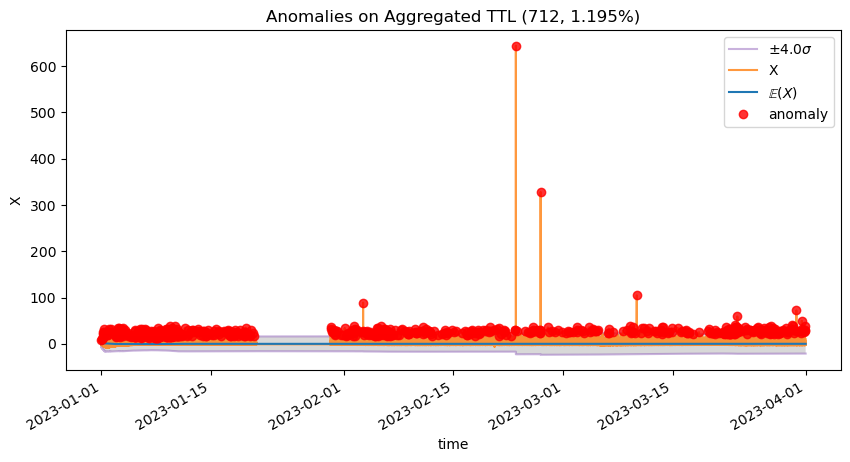

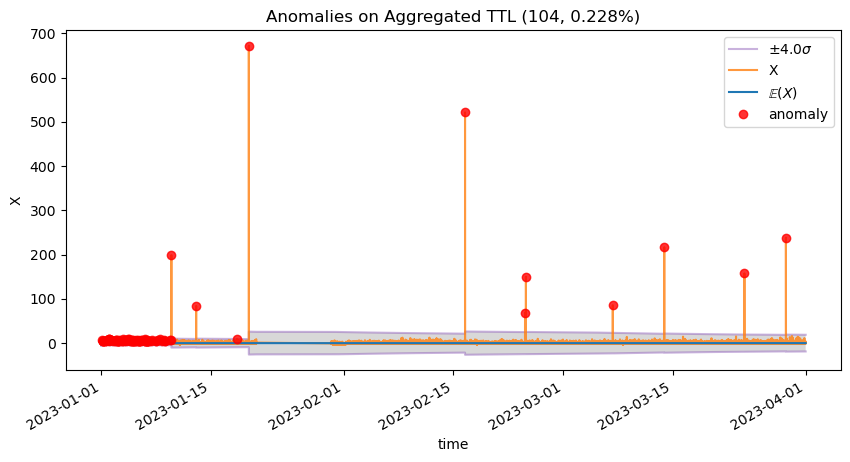

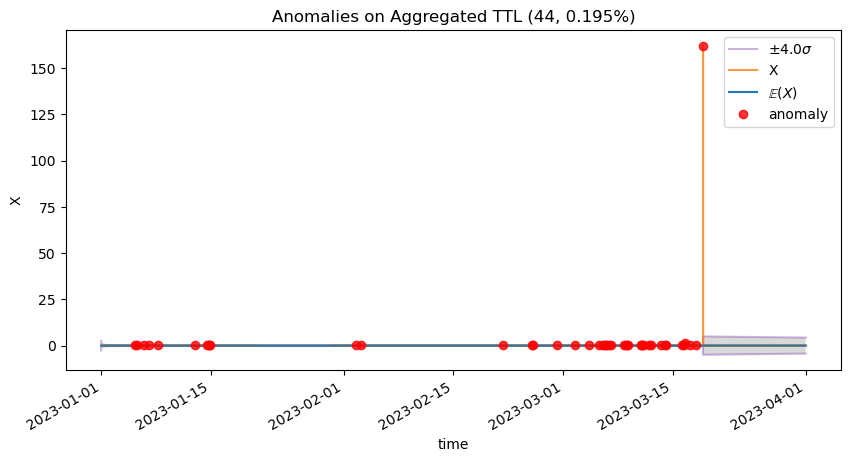

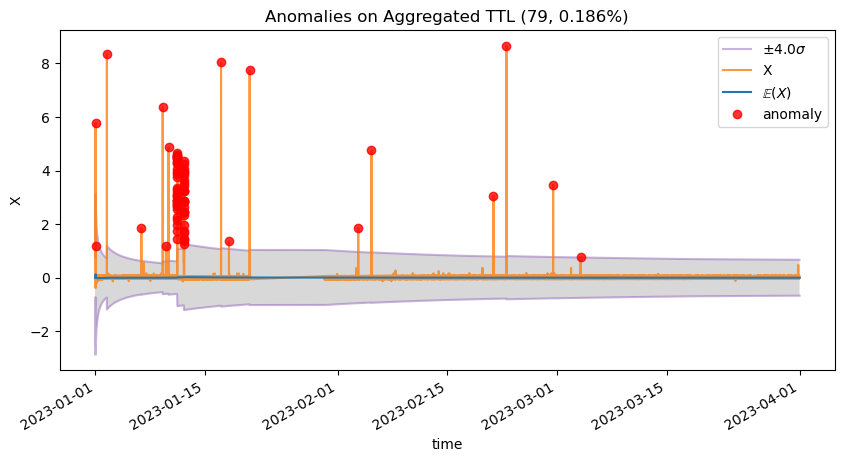

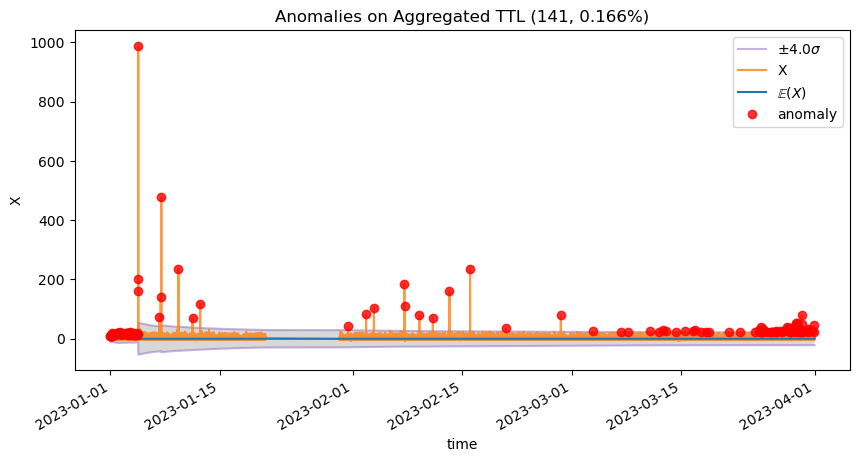

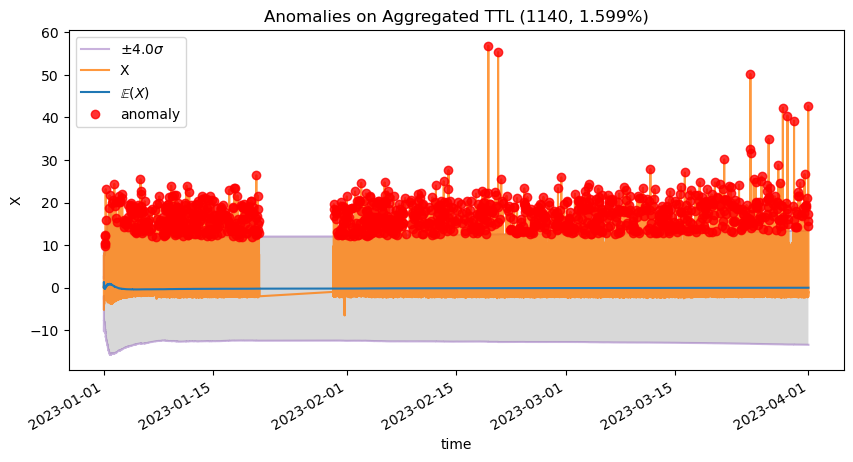

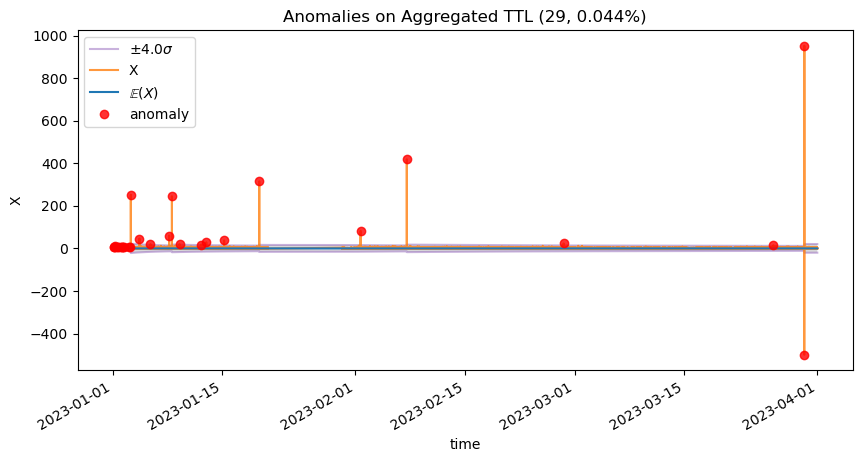

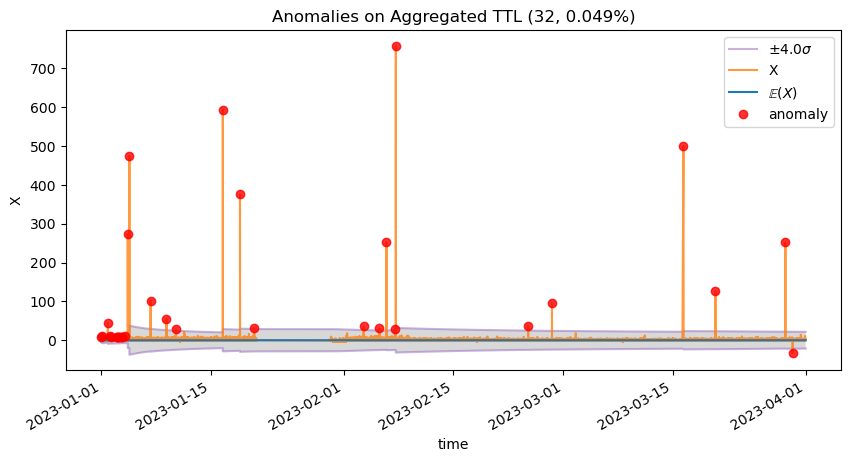

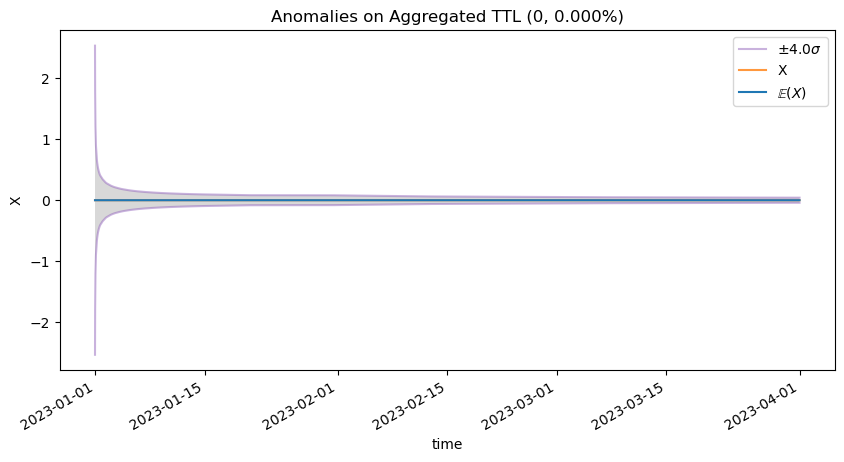

In [20]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        fig = plt.figure(figsize=(10, 5))
        d2.trace_model.final_rtt.plot(ax=fig.gca(), kind="Aggregated TTL")
        # plt.title(f"{k} -> {k2}")
        plt.show()
    # print('='*10)

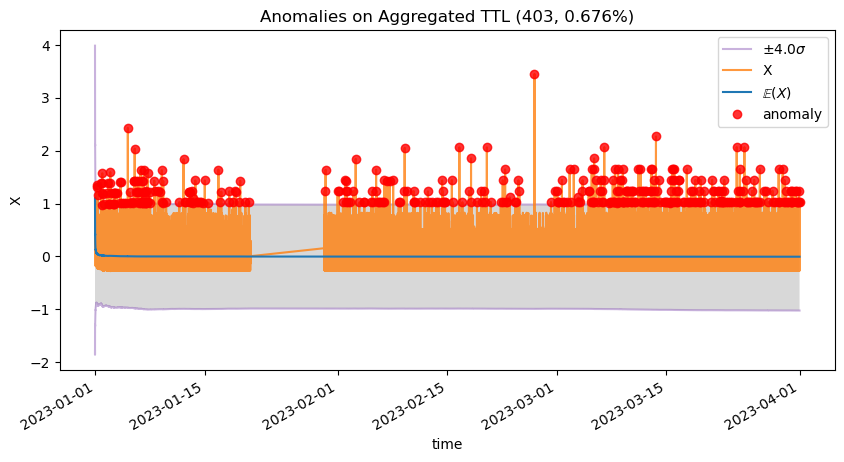

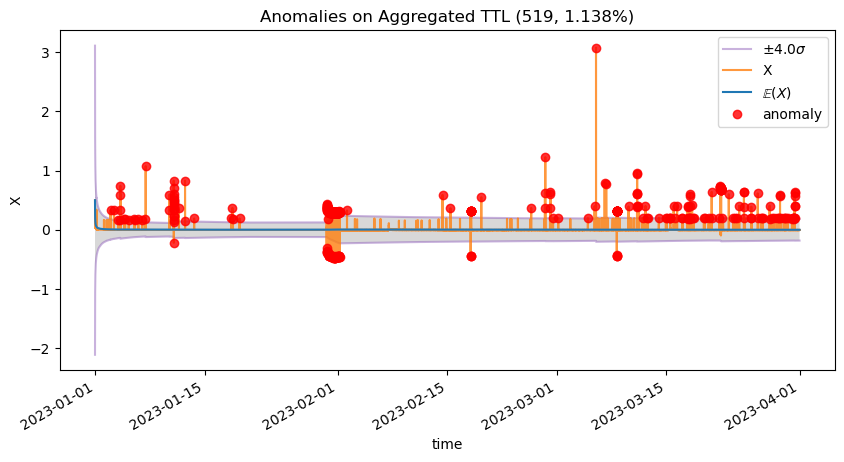

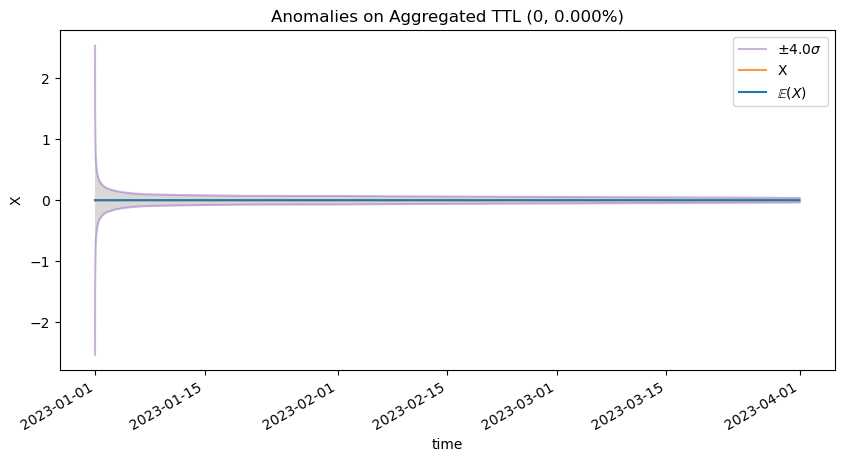

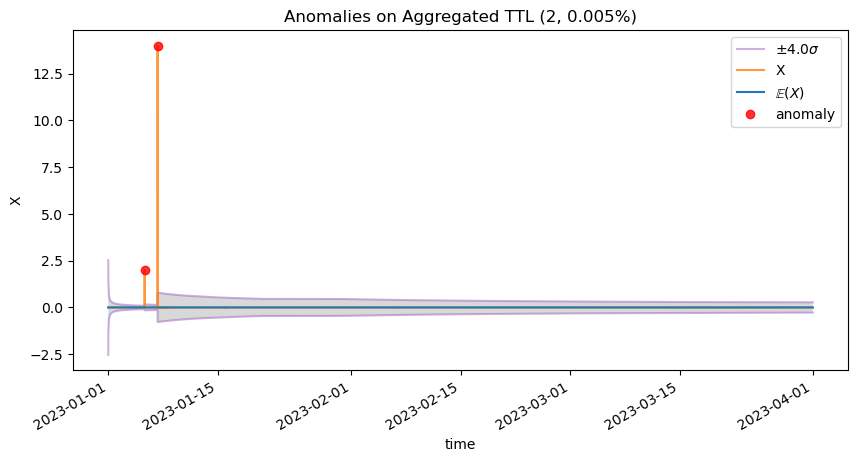

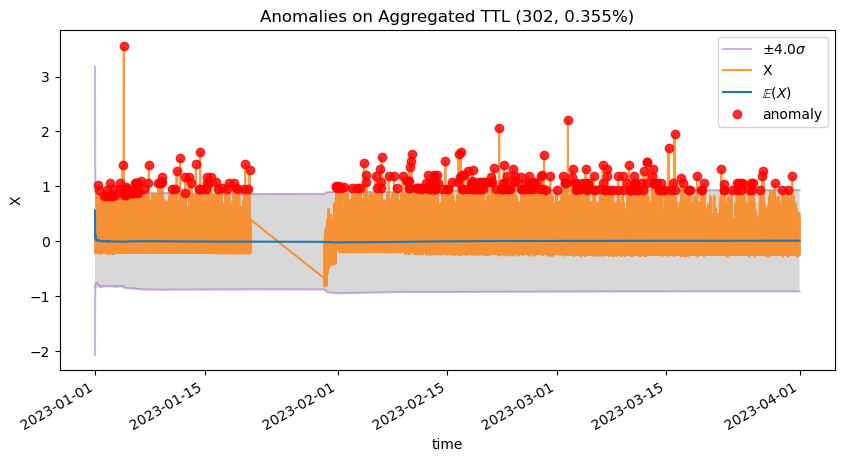

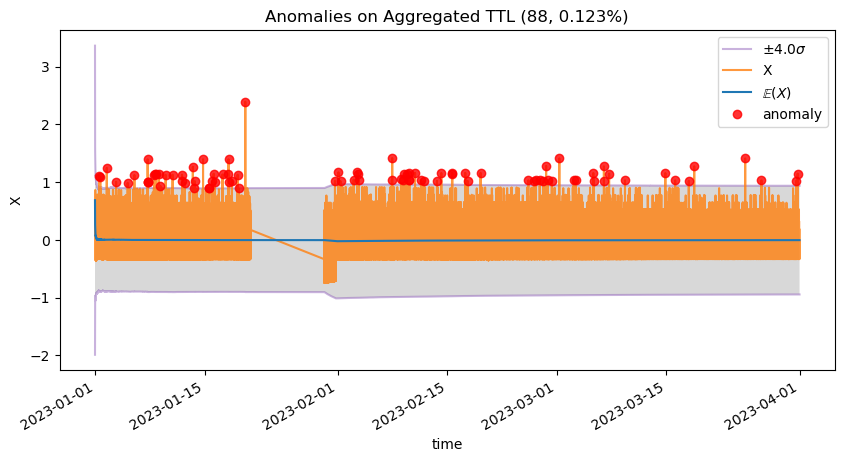

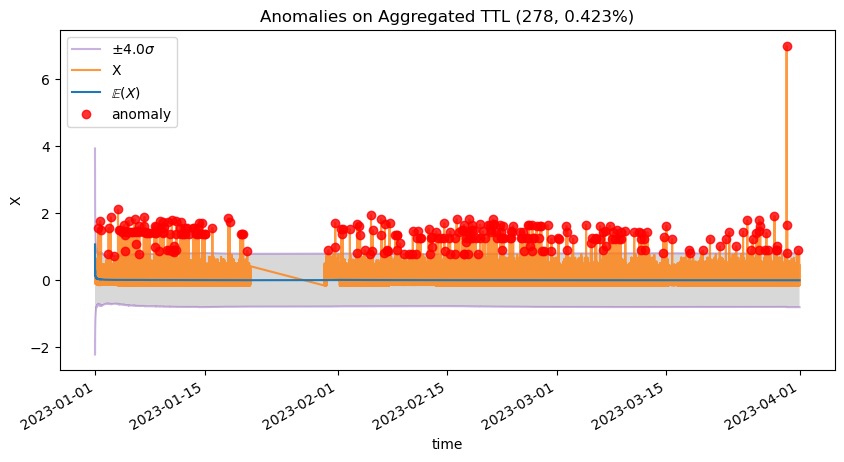

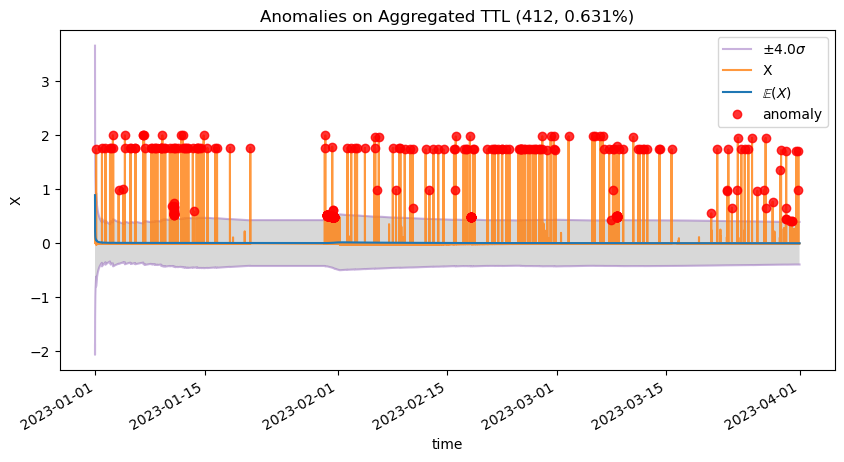

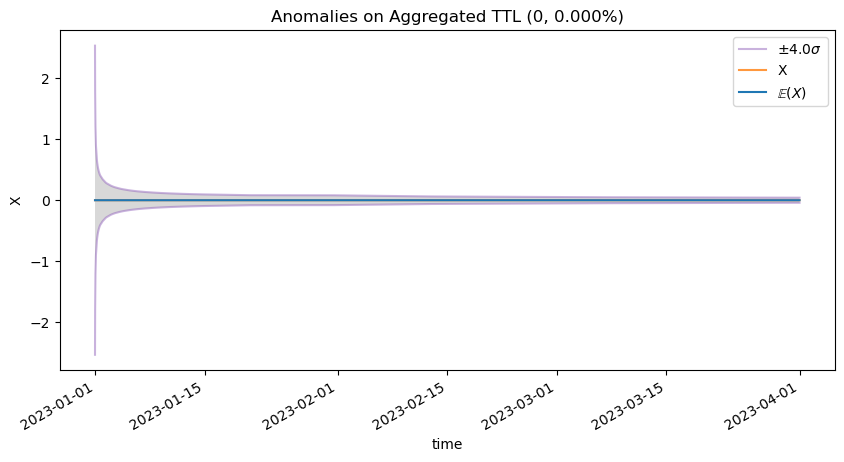

In [ ]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        fig = plt.figure(figsize=(10, 5))
        d2.trace_model.final_ttl.plot(ax=fig.gca(), kind="Aggregated TTL")
        # plt.title(f"{k} -> {k2}")
        plt.show()
    # print('='*10)

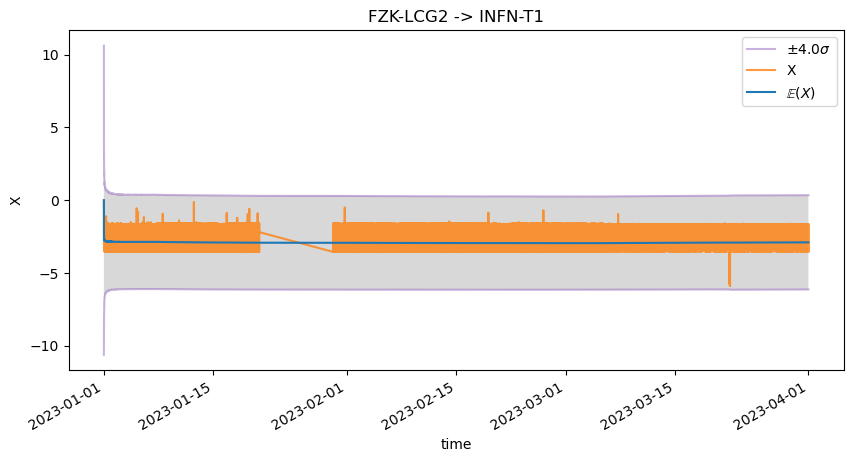

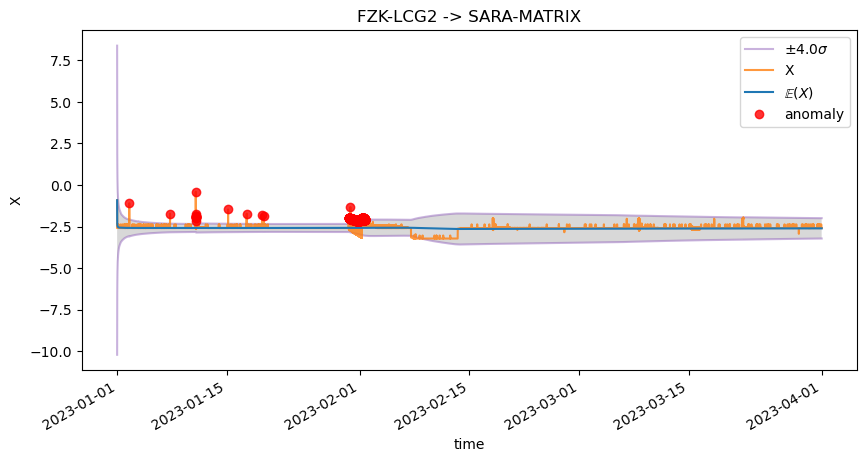

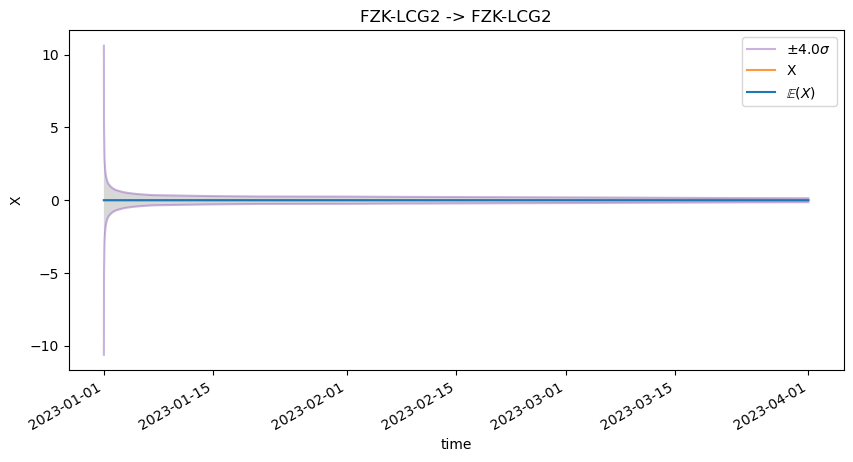

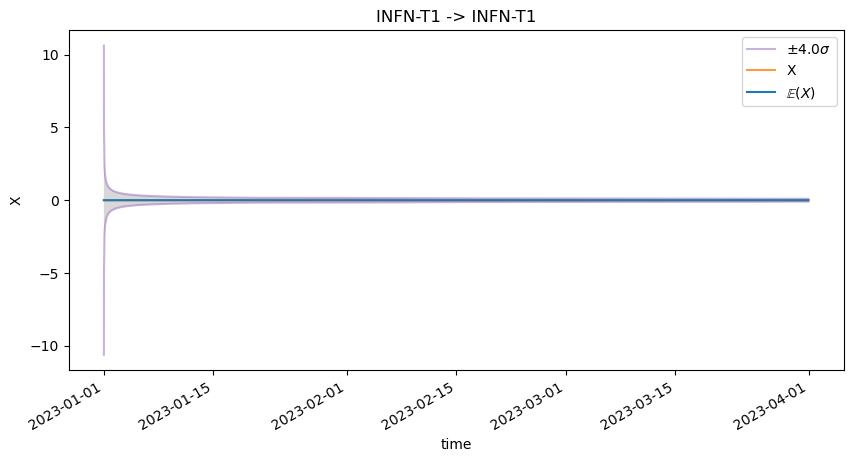

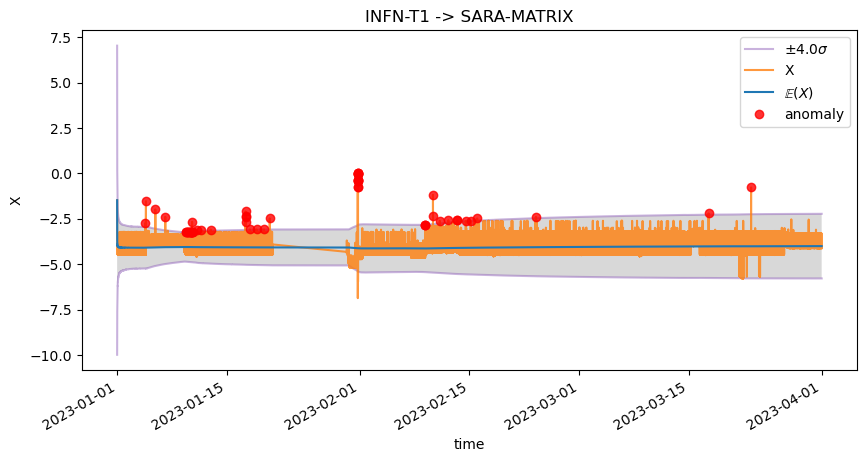

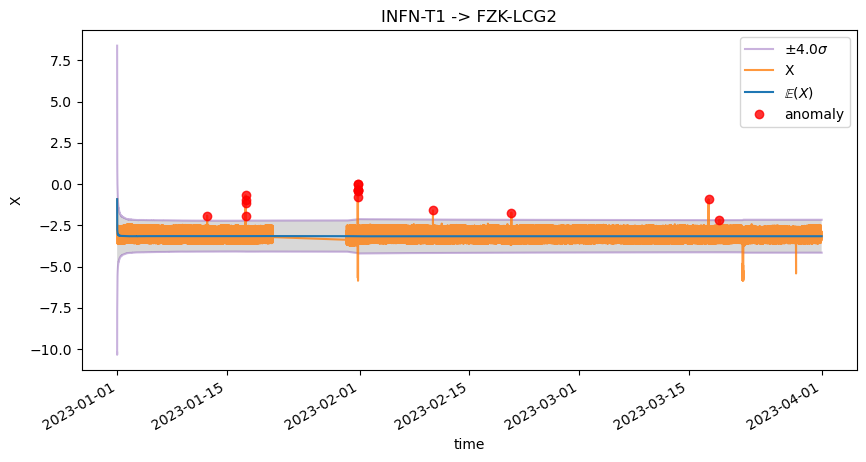

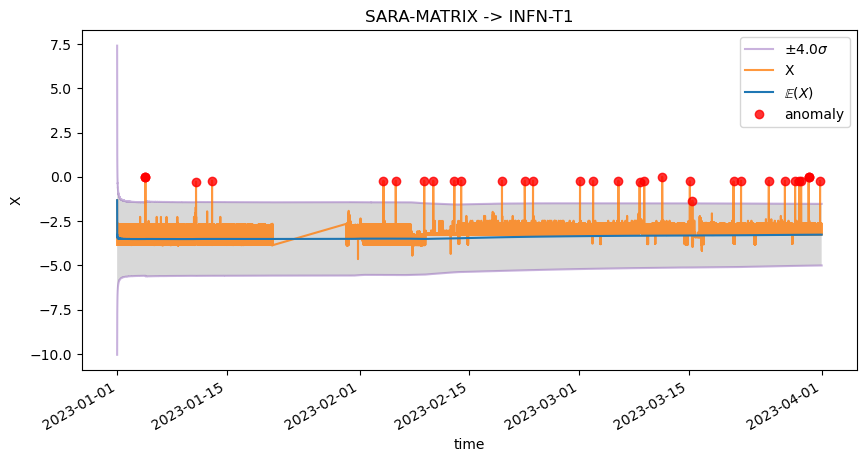

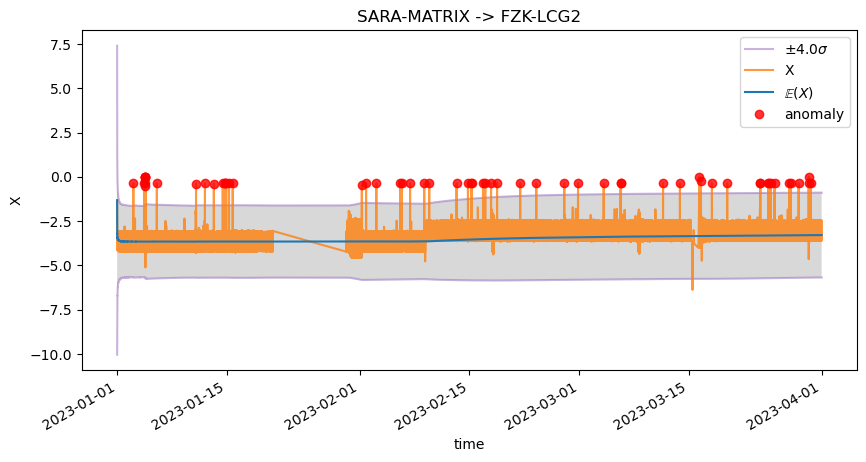

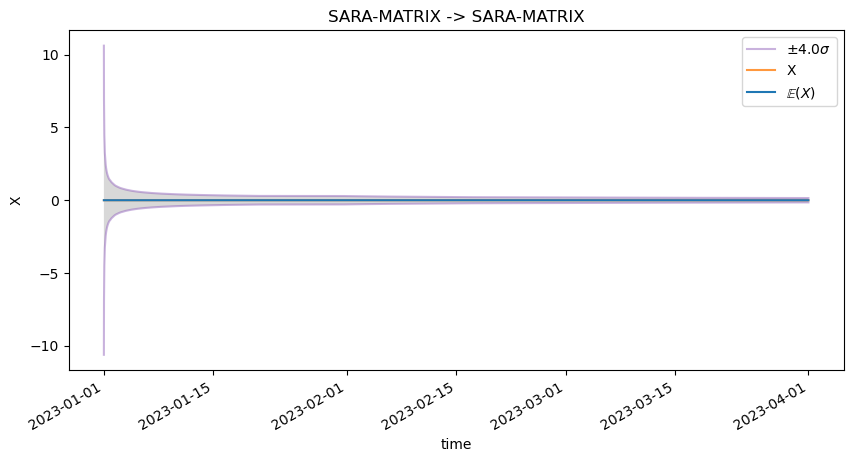

In [22]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        fig = plt.figure(figsize=(10, 5))
        d2.as_model.prob_model.plot(ax=fig.gca())
        plt.title(f"{k} -> {k2}")
        plt.show()
    # print('='*10)

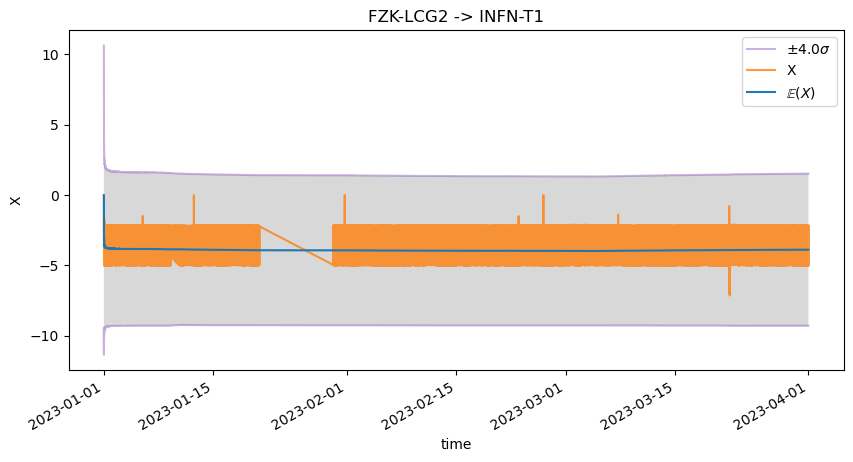

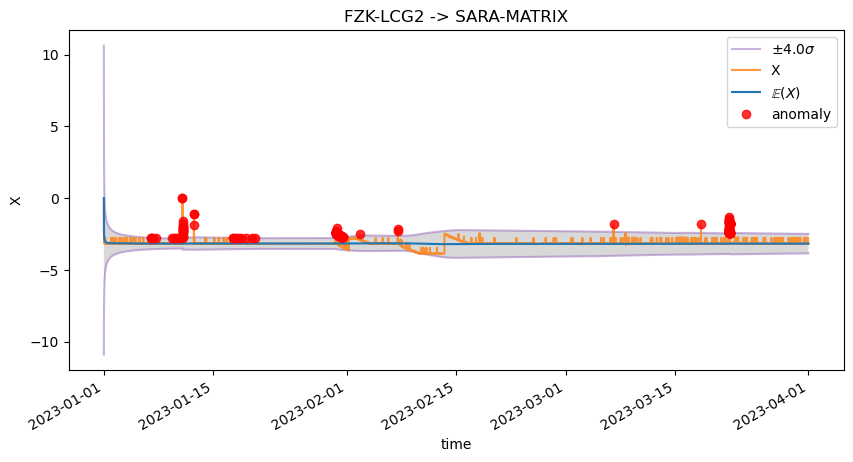

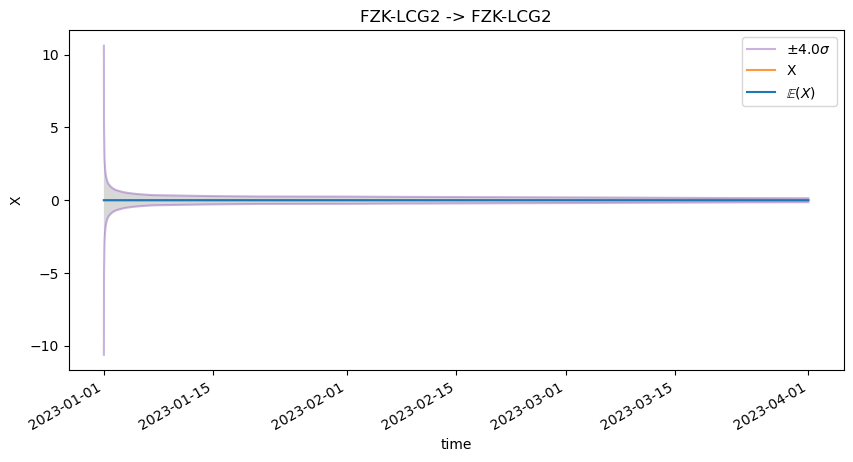

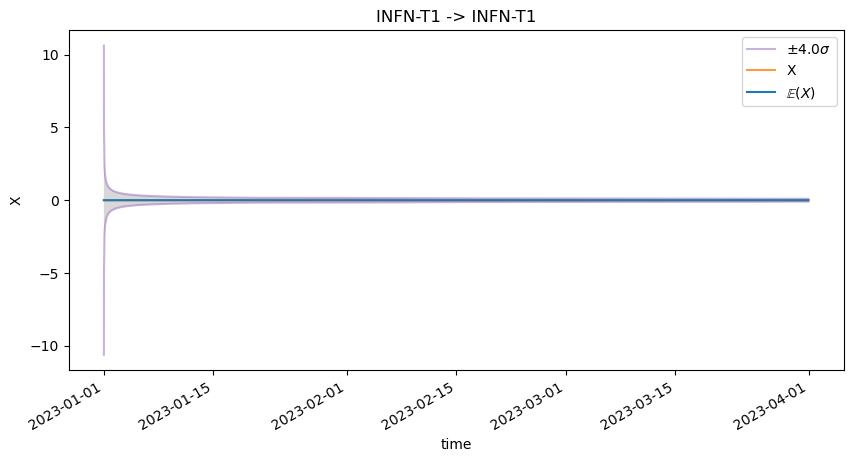

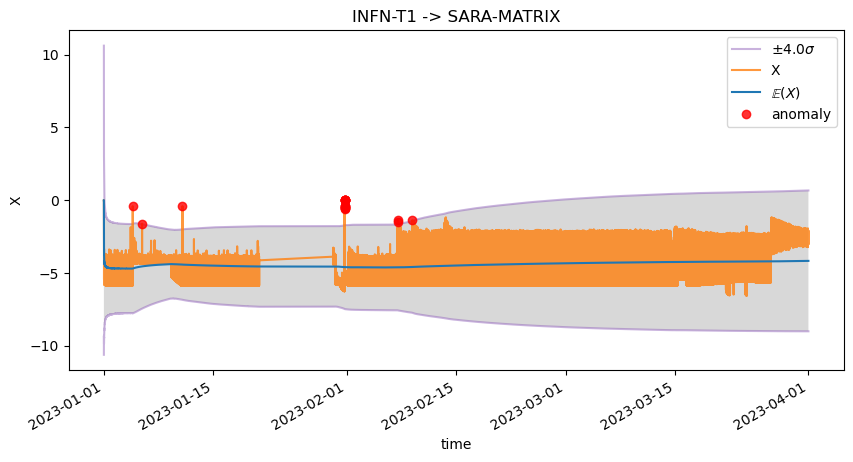

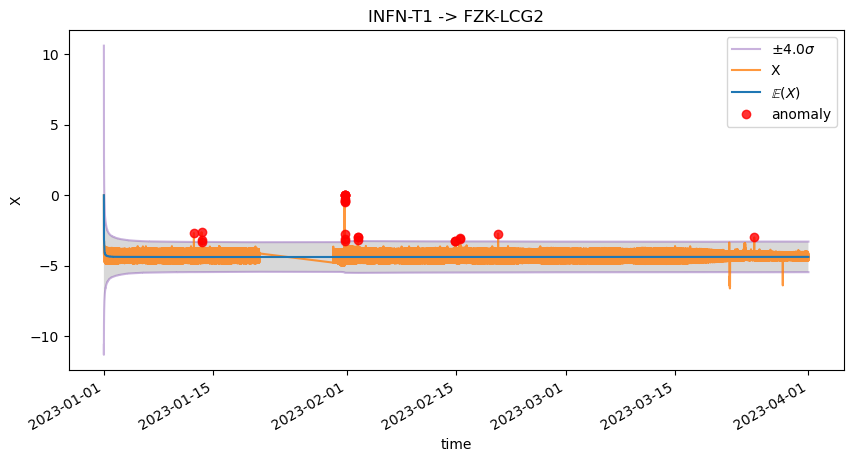

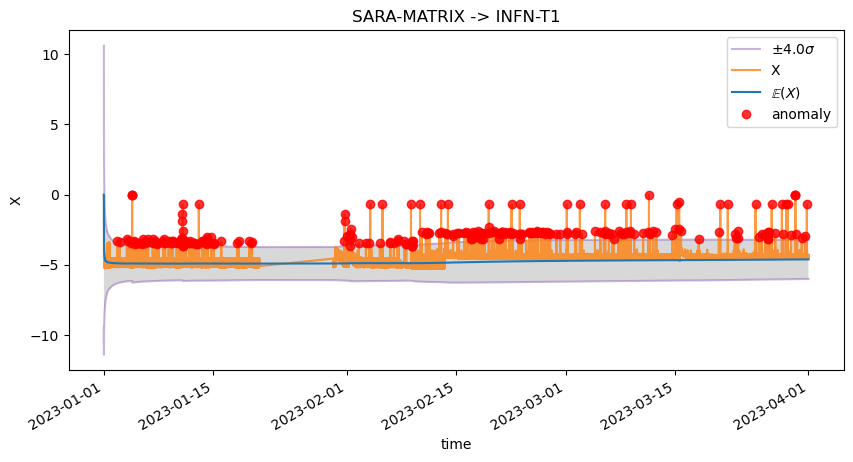

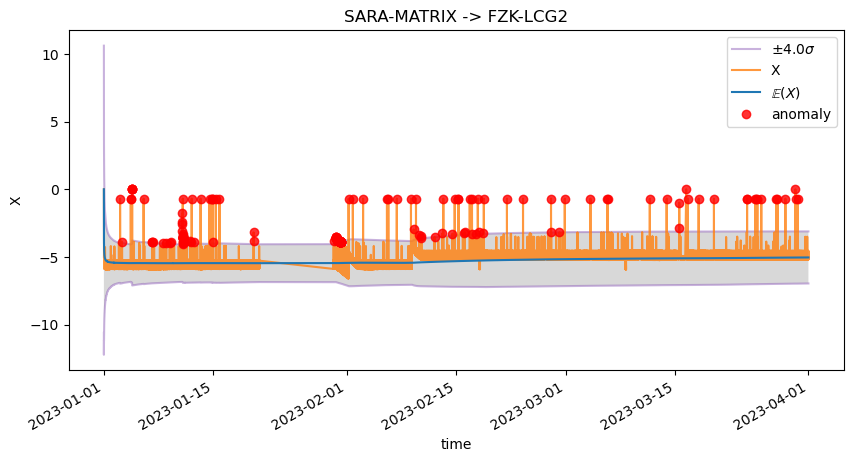

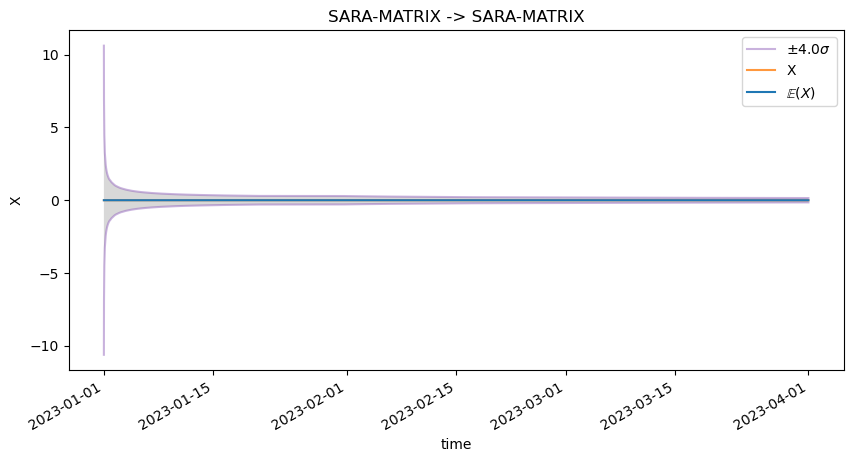

In [28]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        fig = plt.figure(figsize=(10, 5))
        d2.ip_model.prob_model.plot(ax=fig.gca())
        plt.title(f"{k} -> {k2}")
        plt.show()
    # print('='*10)

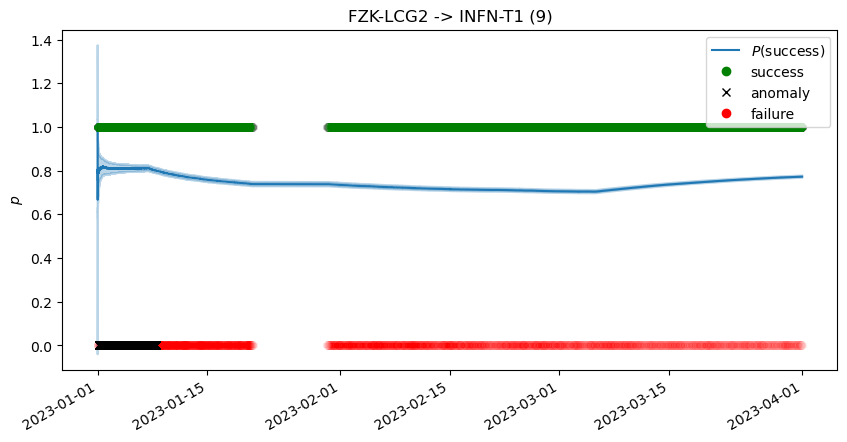

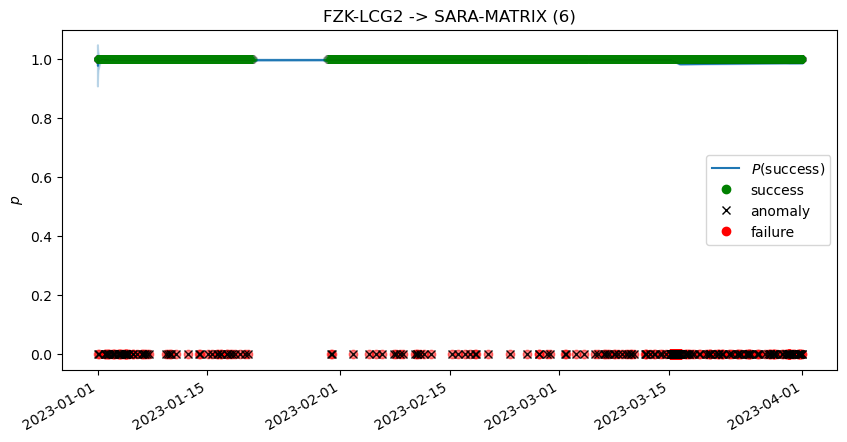

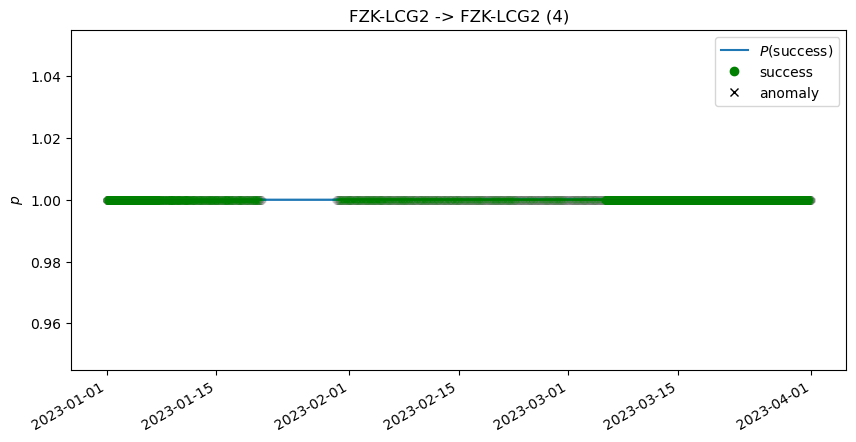

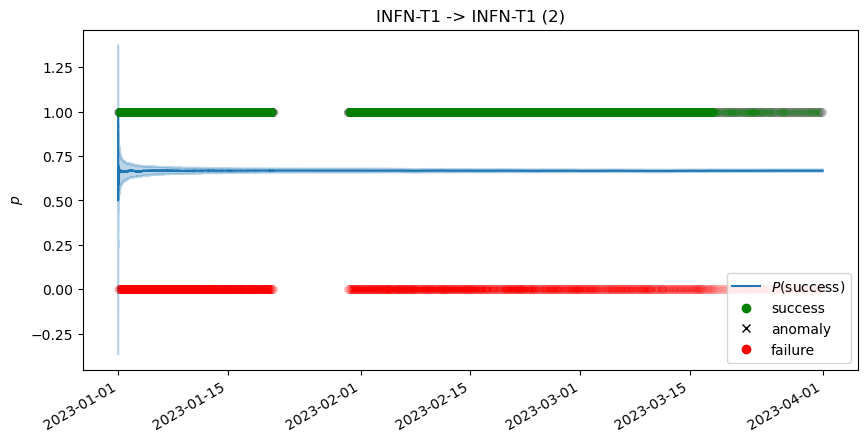

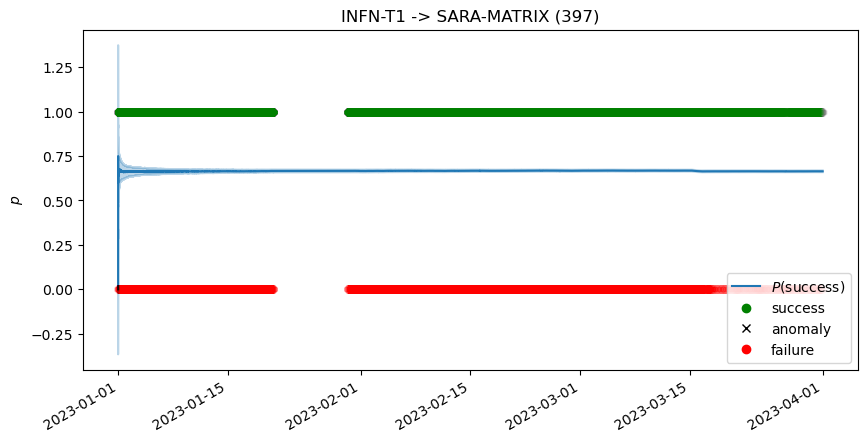

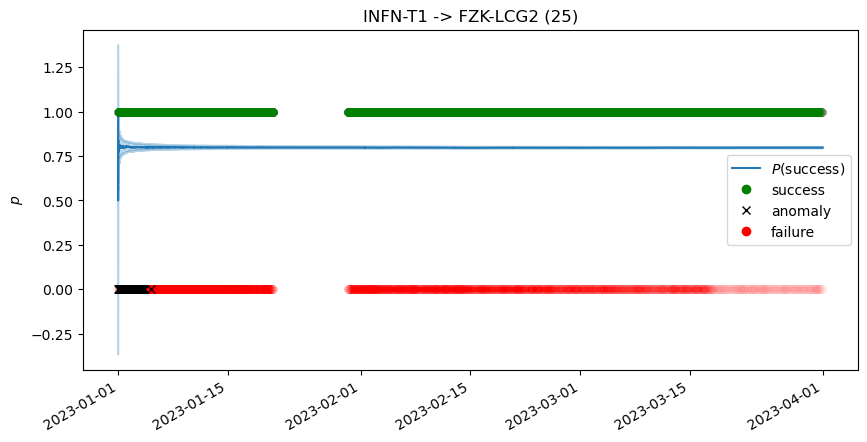

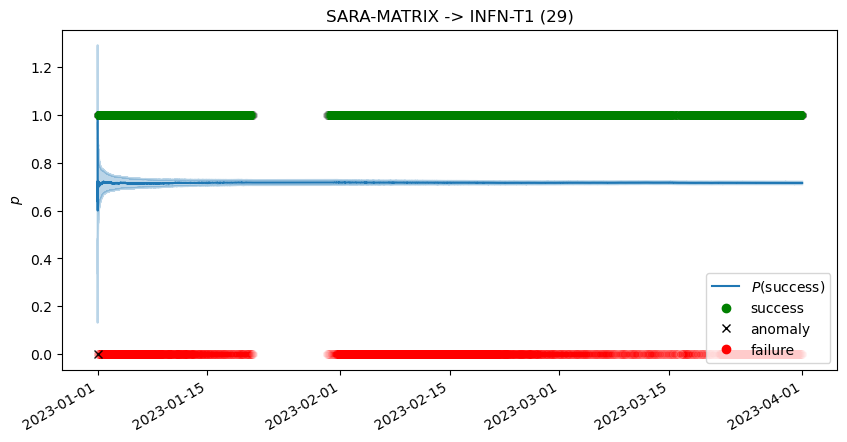

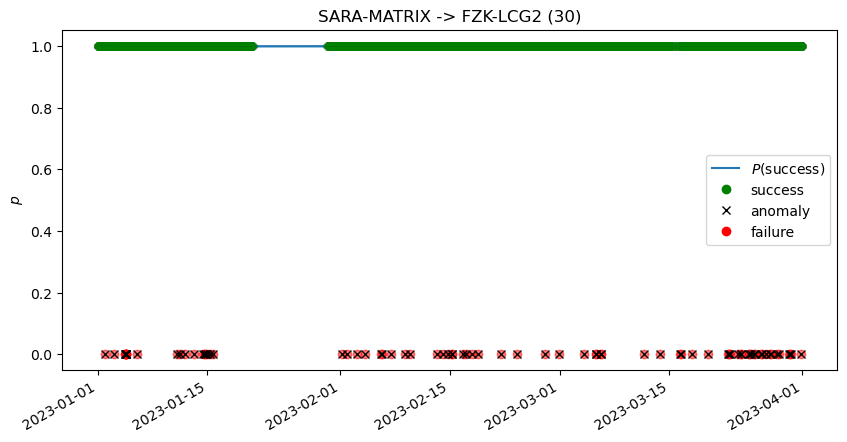

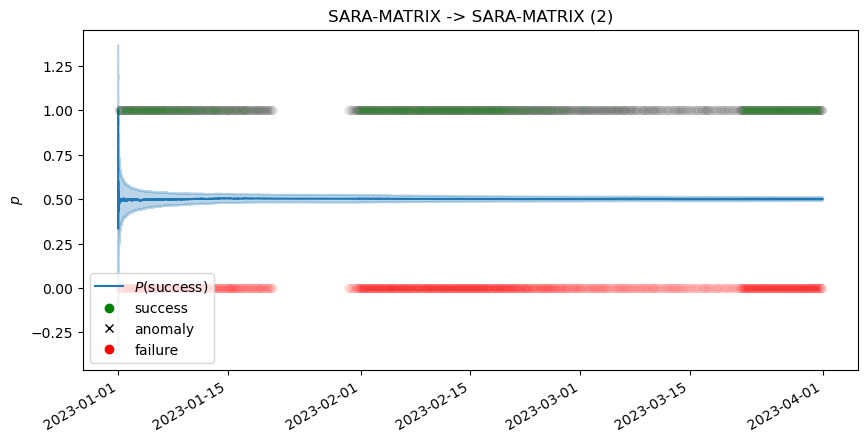

In [31]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        fig = plt.figure(figsize=(10, 5))
        d2.destination_reached.plot(ax=fig.gca())
        plt.title(f"{k} -> {k2} ({len(d2.ip_path_probs.category_counts)})")
        plt.show()
    # print('='*10)

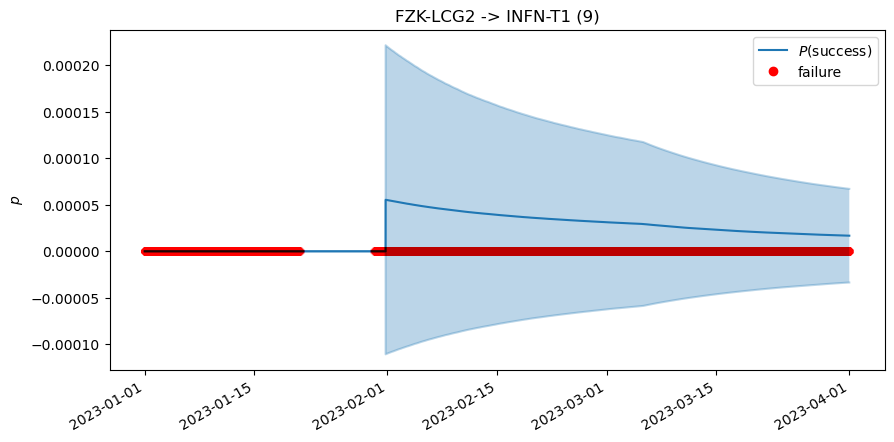

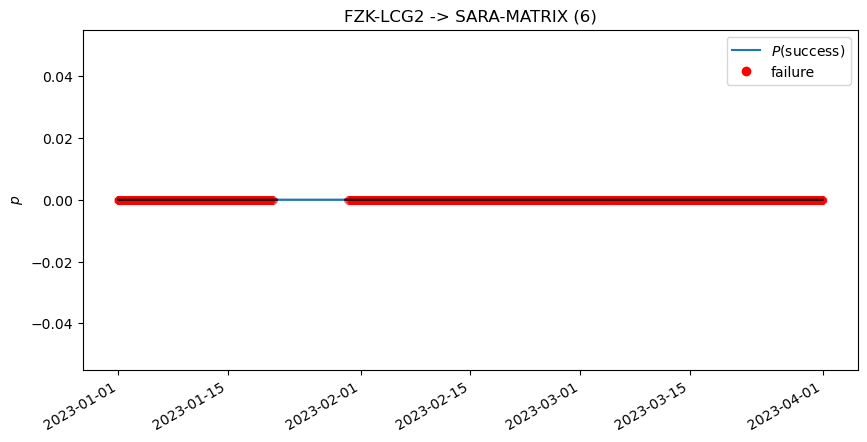

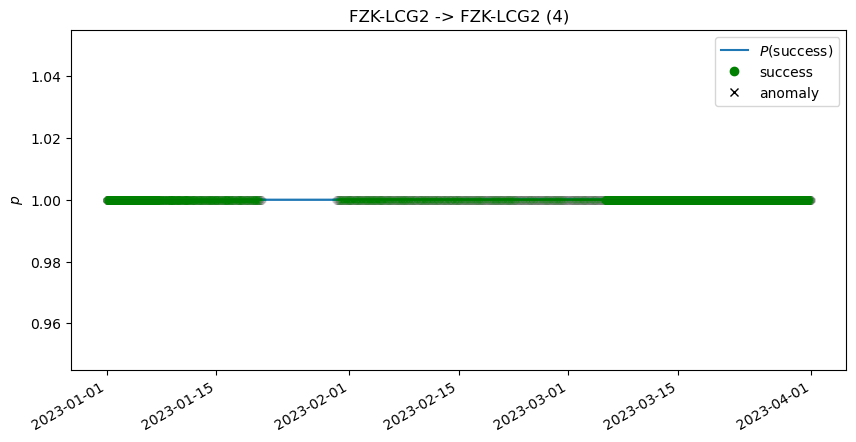

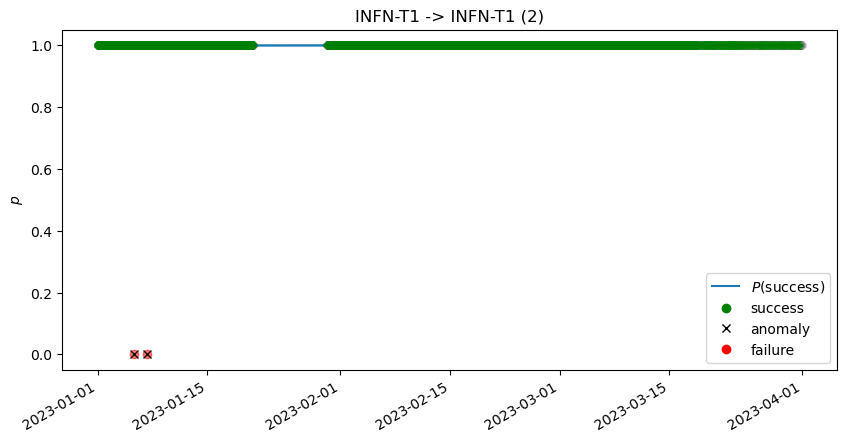

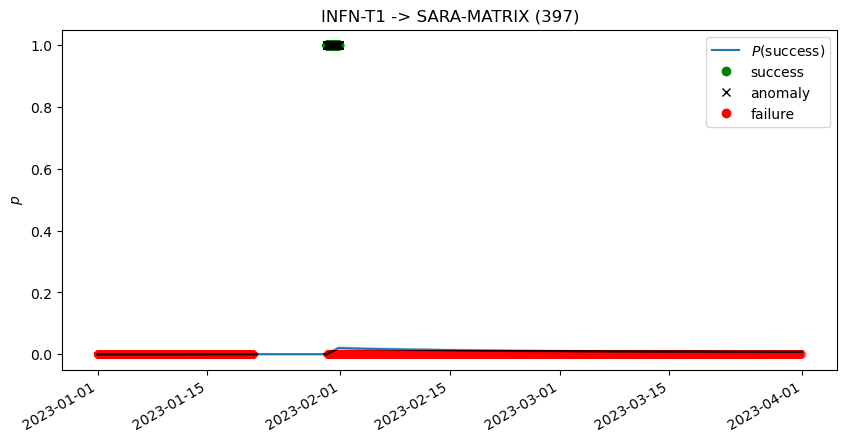

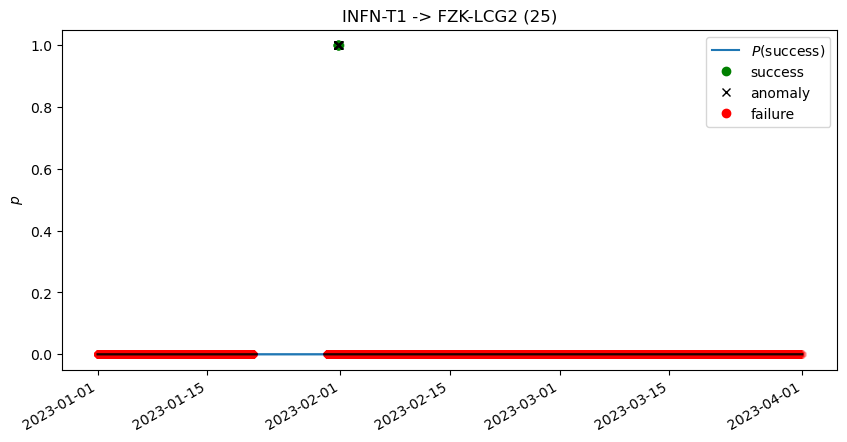

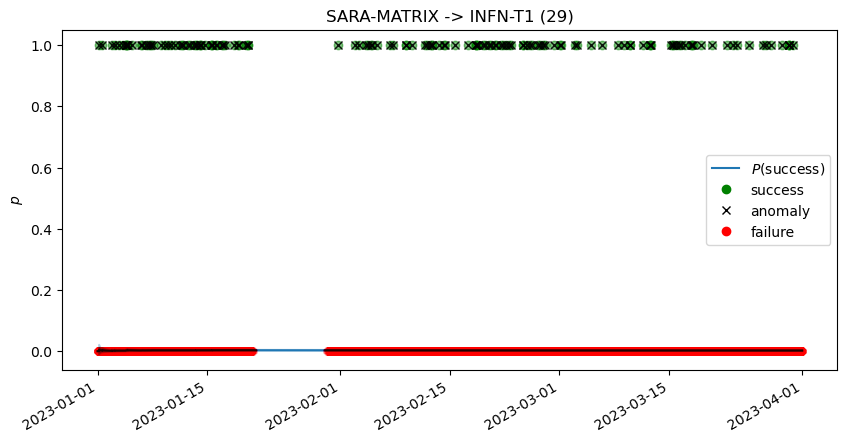

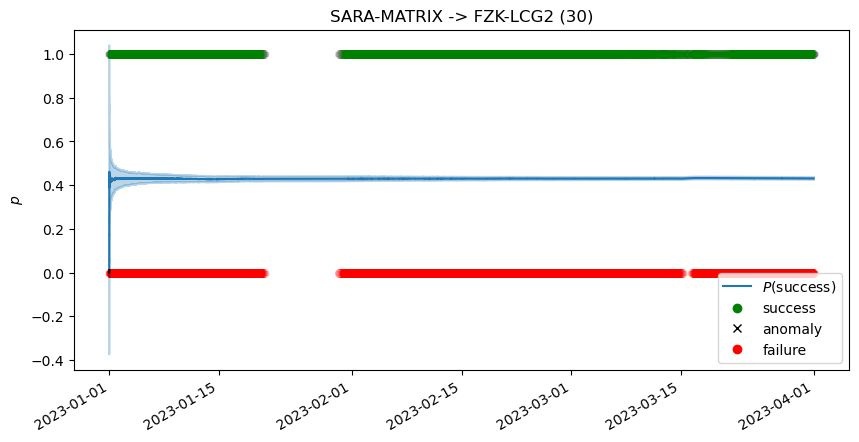

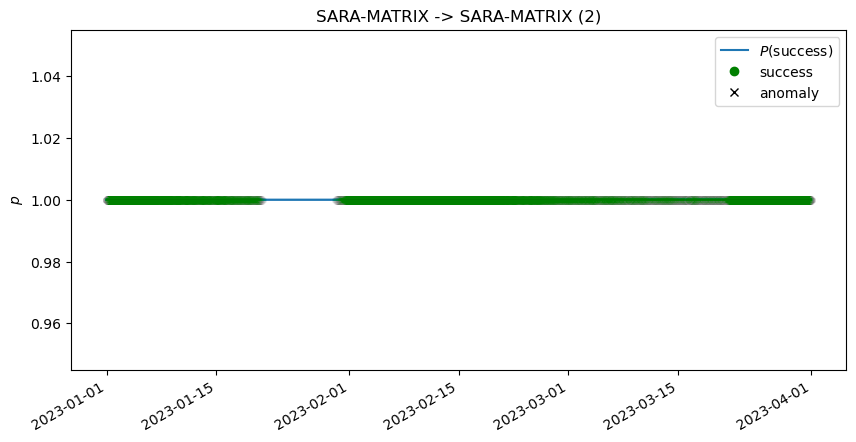

In [32]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        fig = plt.figure(figsize=(10, 5))
        d2.path_complete.plot(ax=fig.gca())
        plt.title(f"{k} -> {k2} ({len(d2.ip_path_probs.category_counts)})")
        plt.show()
    # print('='*10)

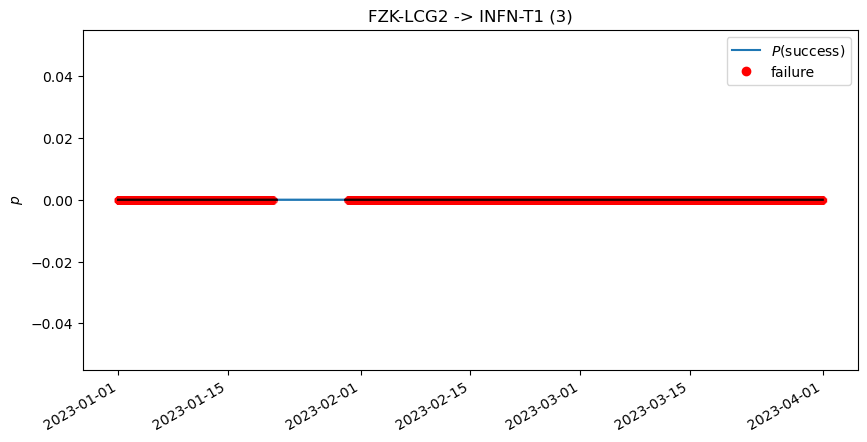

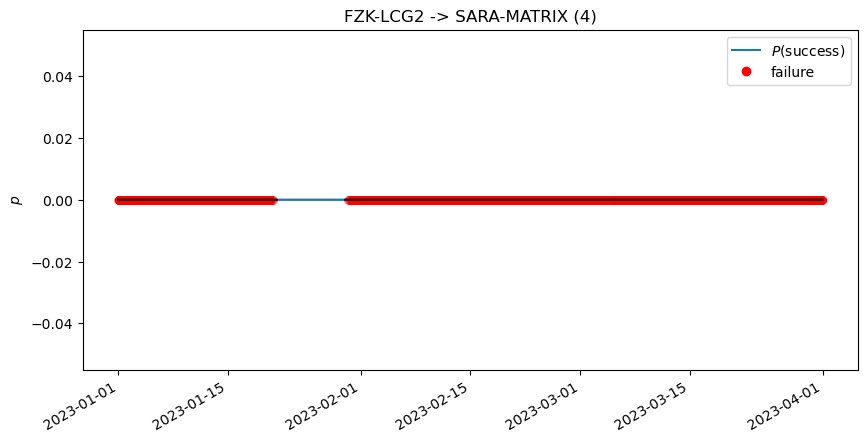

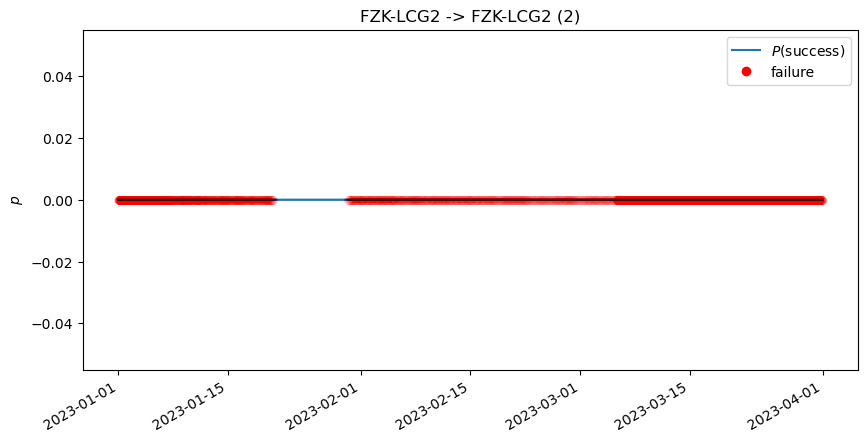

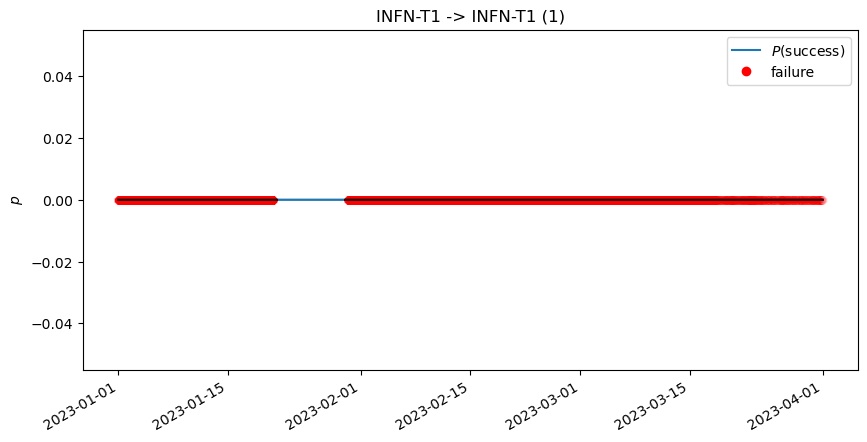

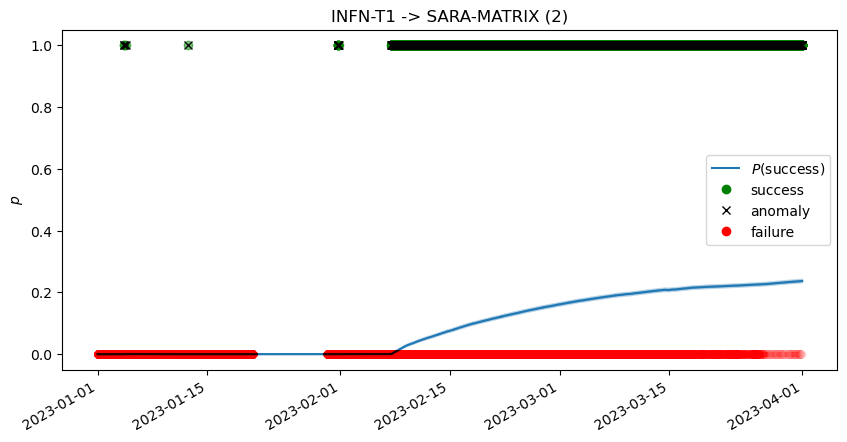

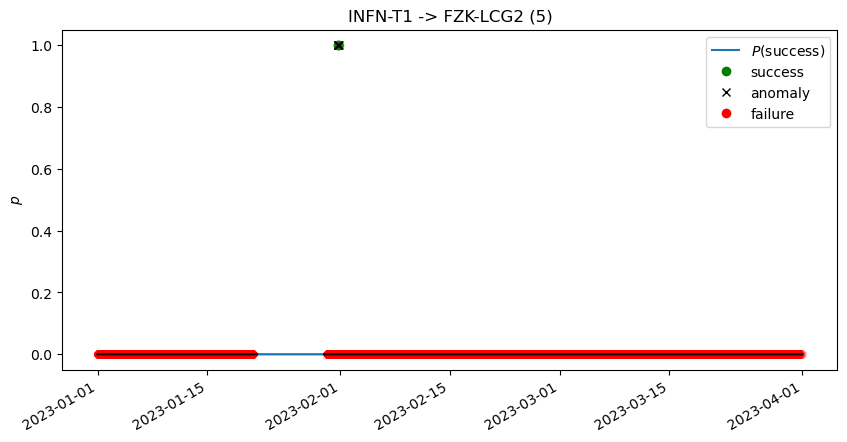

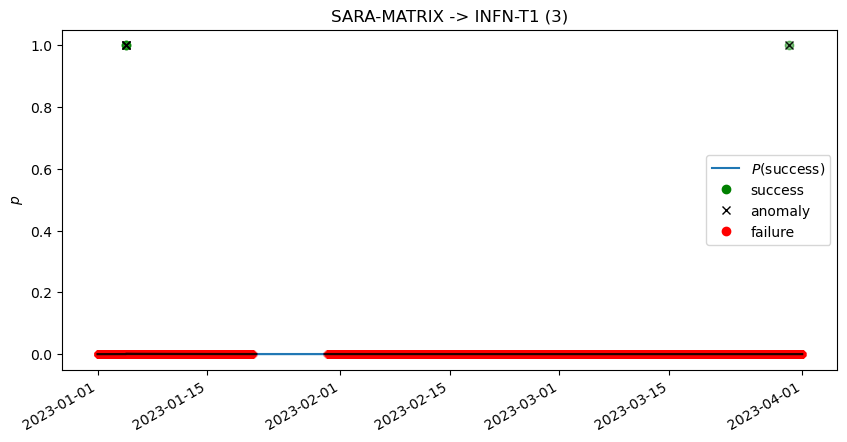

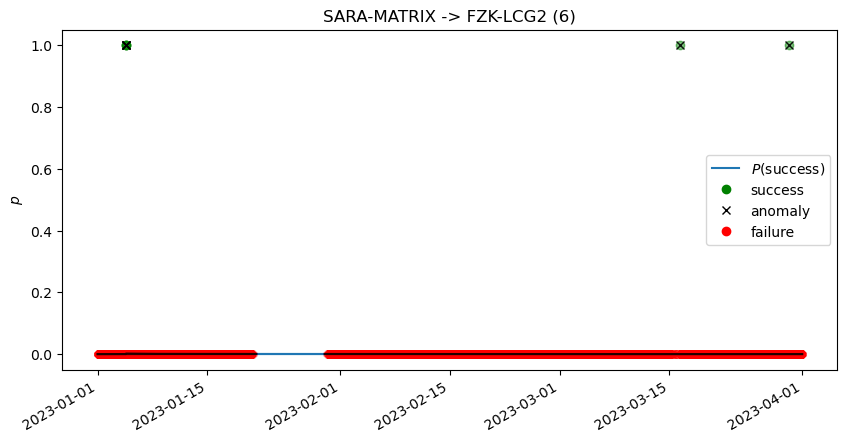

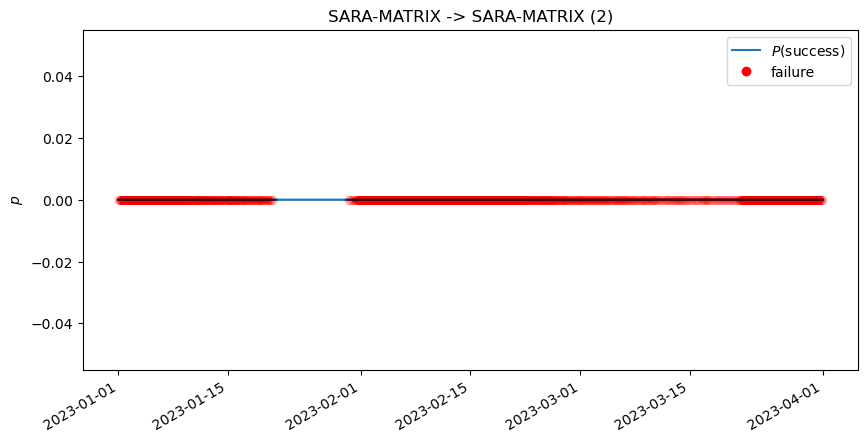

In [34]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        fig = plt.figure(figsize=(10, 5))
        d2.looping.plot(ax=fig.gca())
        plt.title(f"{k} -> {k2} ({len(d2.path_probs.category_counts)})")
        plt.show()
    # print('='*10)

In [46]:
# for k, d in site_analyzer.site_to_site.items():
#     # print(k)
#     for k2, d2 in d.items():
#         # print(k2, d2.n)
#         fig = plt.figure(figsize=(10, 5))
#         d2.path_probs.plot(ax=fig.gca())
#         plt.title(f"{k} -> {k2} ({len(d2.path_probs.category_counts)})")
#         plt.legend().remove()
#         plt.show()
#     # print('='*10)

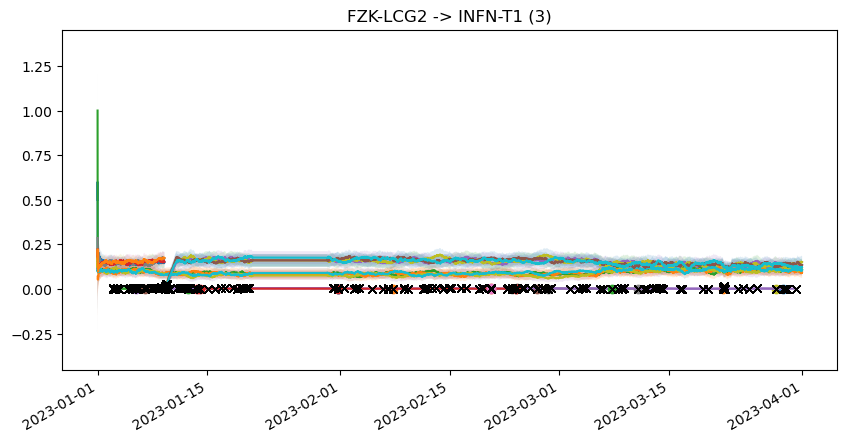

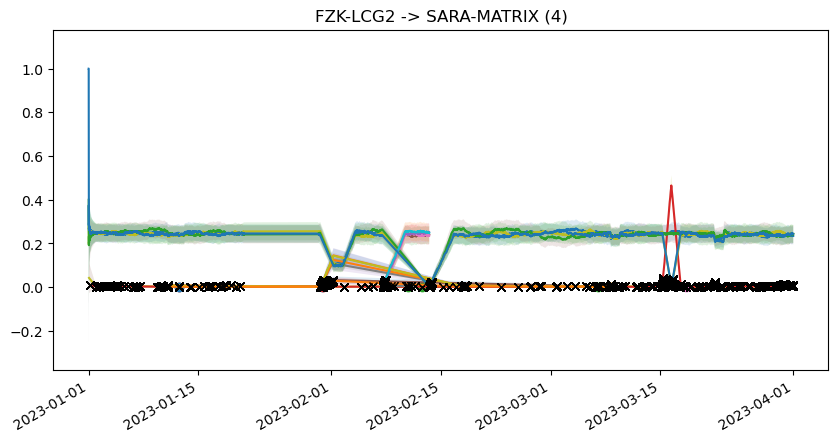

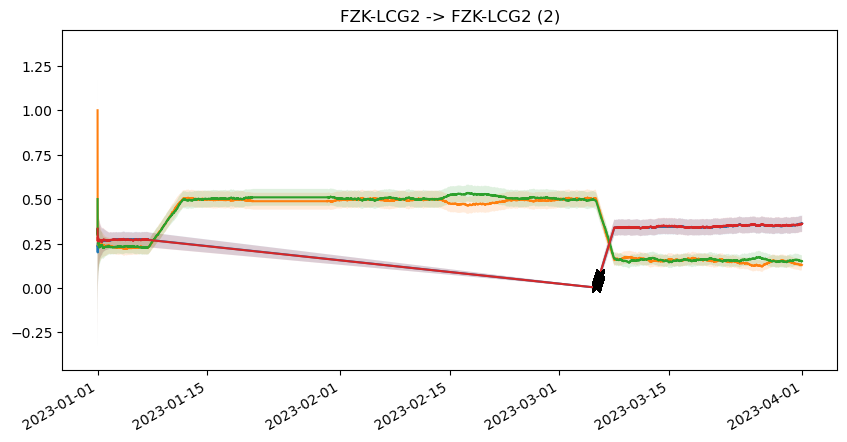

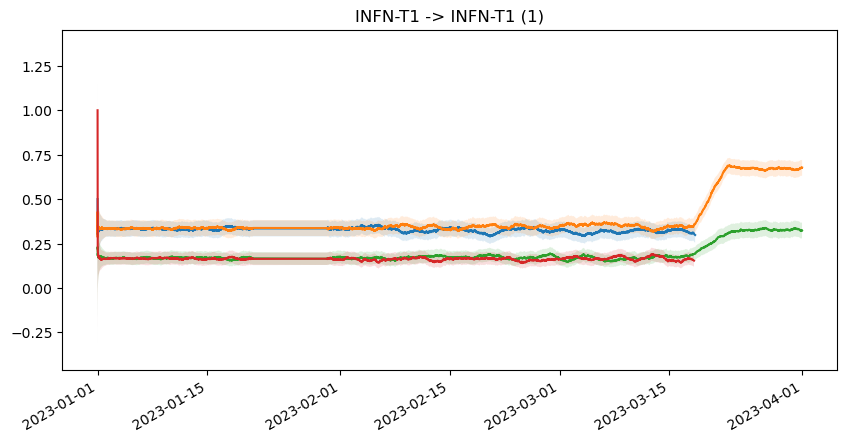

KeyboardInterrupt: 

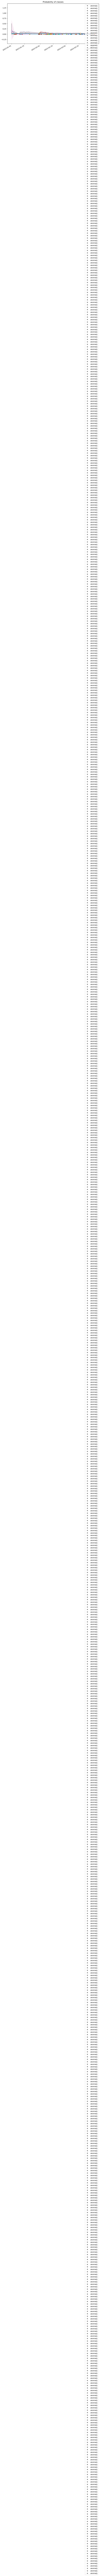

: 

In [136]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        if len(d2.path_probs.category_counts) > 10:
            continue
        fig = plt.figure(figsize=(10, 5))
        d2.ip_path_probs.plot(ax=fig.gca())
        plt.title(f"{k} -> {k2} ({len(d2.path_probs.category_counts)})")
        plt.legend().remove()
        plt.show()
    # print('='*10)

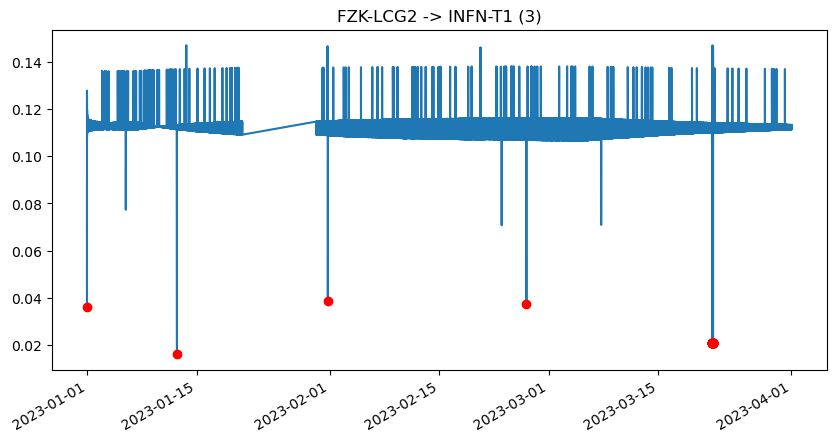

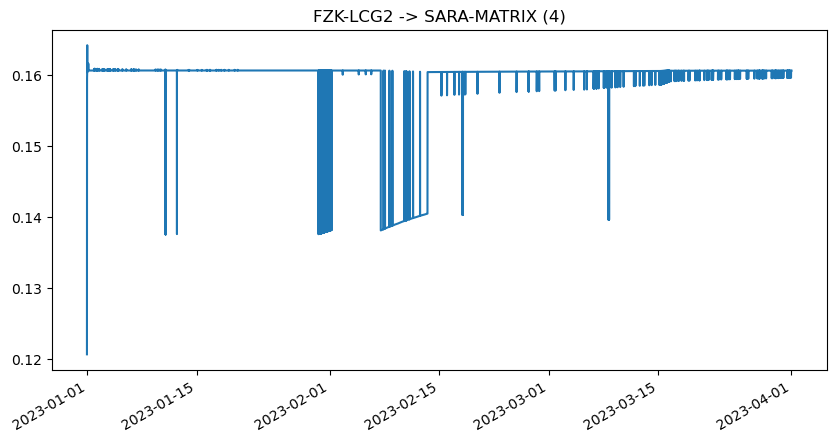

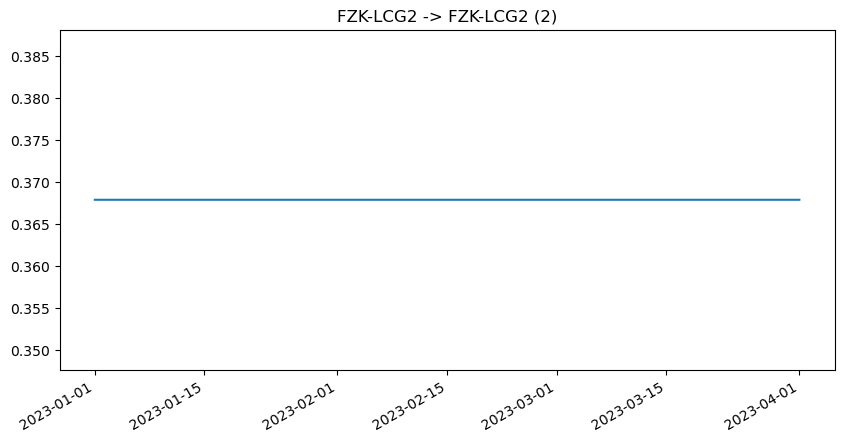

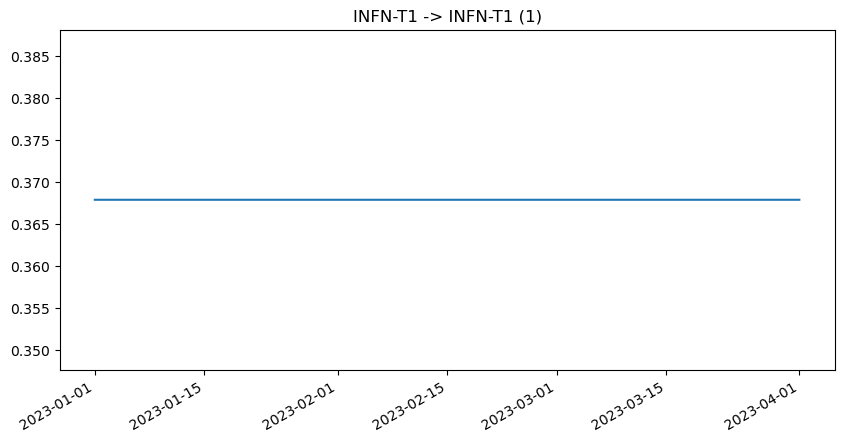

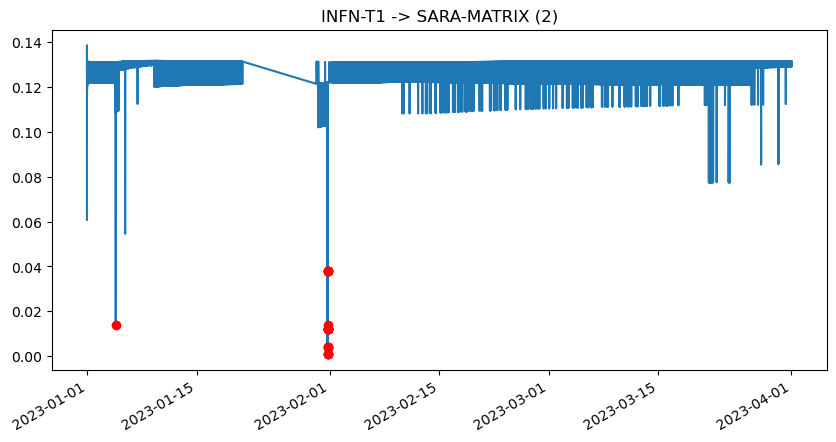

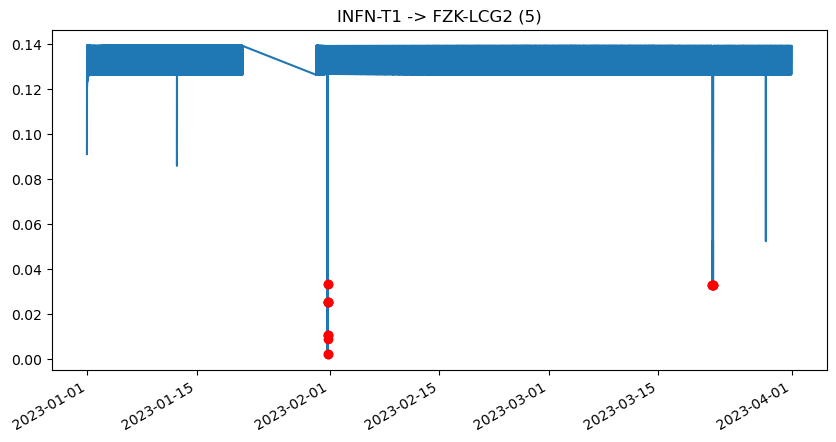

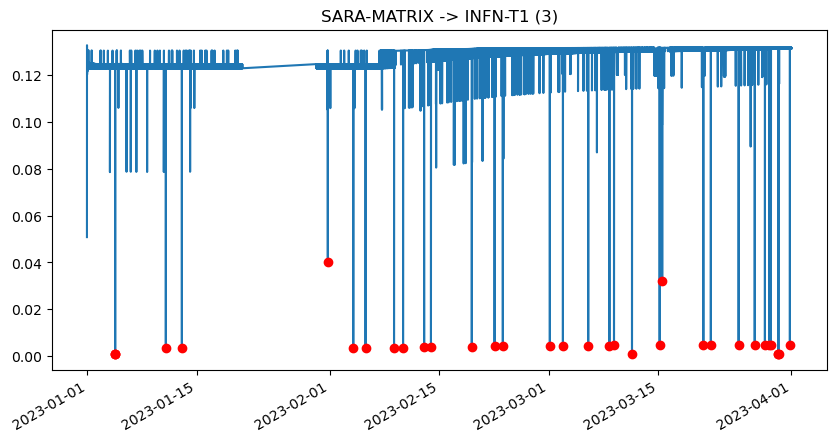

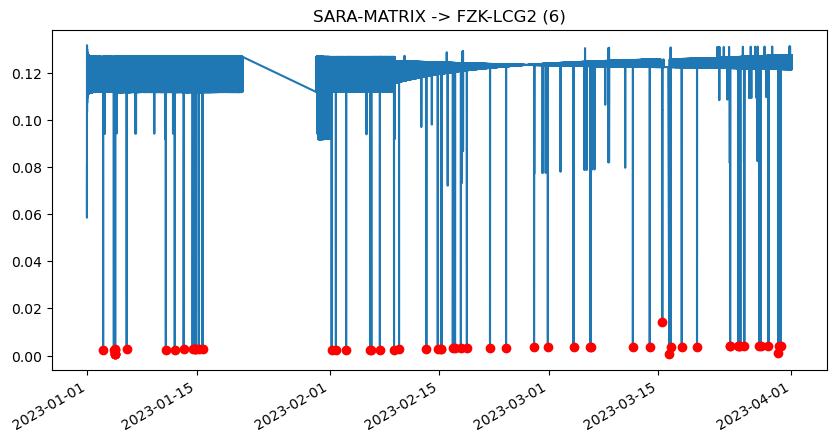

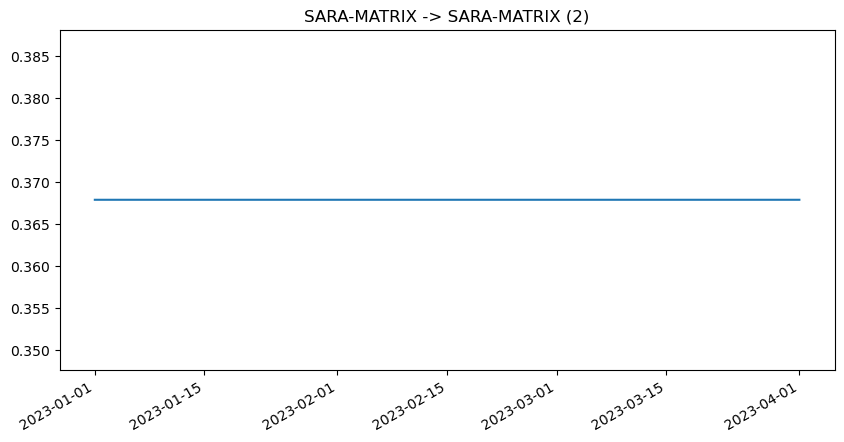

In [48]:
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2, d2.n)
        fig = plt.figure(figsize=(10, 5))
        d2.n_hops_model.plot(ax=fig.gca())
        plt.title(f"{k} -> {k2} ({len(d2.path_probs.category_counts)})")
        plt.legend().remove()
        plt.show()
    # print('='*10)

In [50]:
from collections import defaultdict

In [99]:
n_anomalies = defaultdict(int)
for k, d in site_analyzer.site_to_site.items():
    # print(k)
    for k2, d2 in d.items():
        # print(k2)
        # fig = plt.figure(figsize=(10, 5))
        # print(d2.n_anomalies)
        for t, v in zip(d2.timestamps, d2.n_anomalies):
            n_anomalies[t] += v
        # plt.title(f"{k} -> {k2}")
        # plt.show()
    # print('='*10)

In [100]:
from traced_v2.models.poisson import PoissonModel

In [101]:
import pandas as pd

In [102]:
df = pd.DataFrame.from_dict(n_anomalies, orient="index", columns=["n_anomalies"])

In [103]:
df.index = pd.to_datetime(df.index, unit="ms")

<Axes: >

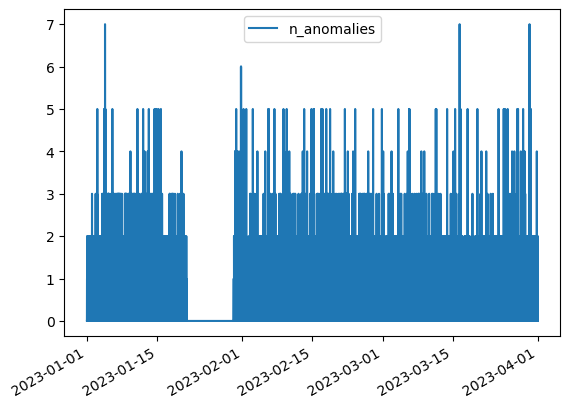

In [104]:
df.plot()  

In [131]:
model = PoissonModel("src", "dest", threshold=.05)

In [132]:
for i,row in df.sort_index().iterrows():
    # print(i.timestamp()*1000, row['n_anomalies'])
    # break
    if row['n_anomalies'] == 0:
        continue
    model.log(i.timestamp()*1000, row['n_anomalies'])

<Axes: >

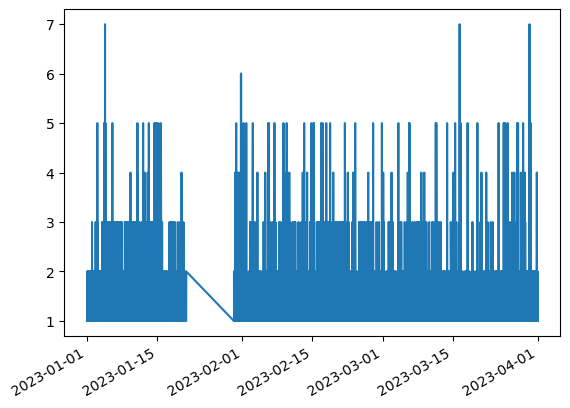

In [133]:
model.to_frame()['observed_values'].plot()

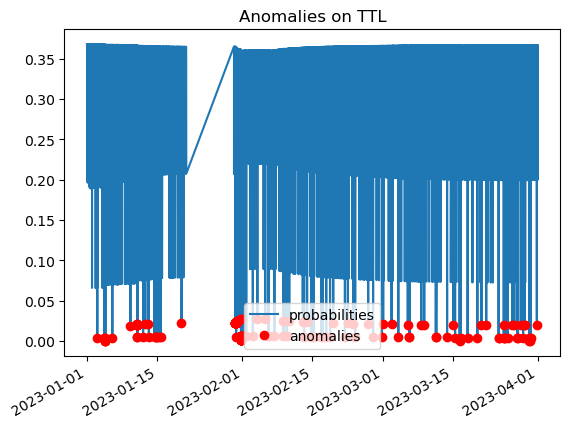

In [134]:
model.plot()

In [29]:
for site, d in site_analyzer.site_to_site.items():
    # print(site)
    for dst, v in d.items():
        # if dst != 'INFN-T1':
        #     continue
        # print("\t", dst, )
        # fig = plt.figure(figsize=(10, 5))
        # ax = fig.add_subplot(111)   
        print(id(v.path_probs))
        # plt.title(f"{site} -> {dst}")
        # plt.show()

140155889250944
140155889248016
140156021253520
140155921296464
140156165440752
140156602988912
140156051398256
140156051405936
140156145230384
